## Question 2: How much is the average of expected salary to who have worked with language: python; java; C#; R; Scala ?

Here we'll import some libraries

In [20]:
import matplotlib.pyplot as plt  # To create a graphic
import seaborn as sns            # To create a graphic
import pandas as pd              # Use to read the data 
import random as rdm             # To let the list random

Reading the file 

In [21]:
df_public = pd.read_csv('survey_results_public.csv') # Reading the data 
df_public.head()  # Showing some (five) lines 

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Modeling and clearing the data

In [22]:
def find_language(what, line):
    '''
    input: 
            what: Language name
            line: DataFrame's line 

    output: 
        bool: True if the language name is in DataFrame's line. Otherwise False 
    '''
    line = str(line).lower().split(';')
    for language in line:
        if what == language.strip():
            return True 
    return False

def Get_DataFrame(df, language):
    '''
    This function will return the DataFrame with two colums: HaveWorkedLanguage and ExpectedSalary without NaN

    input:
            df: DataFrame that you want to find the chooice language name 
            language: Language name 
    
    output: 
            DataFrame with chooice language in each line in the column "HaveWorkedLanguage"
    '''
    return df[df['HaveWorkedLanguage'].apply(lambda x: find_language(language, x))][['HaveWorkedLanguage', 'ExpectedSalary']].dropna(axis=0, how='any') 

# Creating a new DataFrame with the clean data
new_df = pd.DataFrame( 
    {
        # In each line we calling the function "Get_DataFrame" to return a DataFrame 
        # just with line that has the following programming language: python; java; c#; r; scala. 
        # And getting the average to each programming language
        'Average salary of some language': [
            Get_DataFrame(df_public, 'python')['ExpectedSalary'].mean(), 
            Get_DataFrame(df_public, 'java')['ExpectedSalary'].mean(),
            Get_DataFrame(df_public, 'c#')['ExpectedSalary'].mean(),
            Get_DataFrame(df_public, 'r')['ExpectedSalary'].mean(),
            Get_DataFrame(df_public, 'scala')['ExpectedSalary'].mean()
            ]
    }, 
    index=['python', 'java', 'c#', 'r', 'scala']
)

new_df


,Average salary of some language
python,36896.594422
java,30677.071707
c#,30554.668815
r,36545.846438
scala,41390.124064


## Letting the data random

Here we'll create two list:

1° All the index values

2° All the values

And let the data random

In [23]:
values_list = list(new_df['Average salary of some language']) # getting all the values 
index_list = list(new_df.index)  # getting all the index values 
new_list = [] 

for cont in range(len(index_list)):
    # saving the index with the value to not lose order and lose all the data
    new_list.append(f'{index_list[cont]}&&&&&{values_list[cont]}') 

# Letting the new list random
rdm.shuffle(new_list)

y_values = [] 
x_values = []
for item in new_list:
    index, value = item.split('&&&&&') # splitting saved item in list to separate index and value
    x_values.append(index)         # saving the index in the new list
    y_values.append(float(value))  # saving the value in the new list

print(new_list)
print(x_values)
print(y_values)


['java&&&&&30677.071706539155', 'r&&&&&36545.846438143904', 'scala&&&&&41390.12406353206', 'python&&&&&36896.594421961105', 'c#&&&&&30554.66881519278']
['java', 'r', 'scala', 'python', 'c#']
[30677.071706539155, 36545.846438143904, 41390.12406353206, 36896.594421961105, 30554.66881519278]


Creating one DataFrame to use in the graphic. This will be a line format that will be with the bar format  

In [24]:
df_line = pd.DataFrame({
        '': [i/2 for i in y_values] # dividing the amount in half. So the line will be in a half of bar
        }
)

## Graphic

The graphic will show the avarege of the salary to programming language: Python; Java; Scala; R; C#.

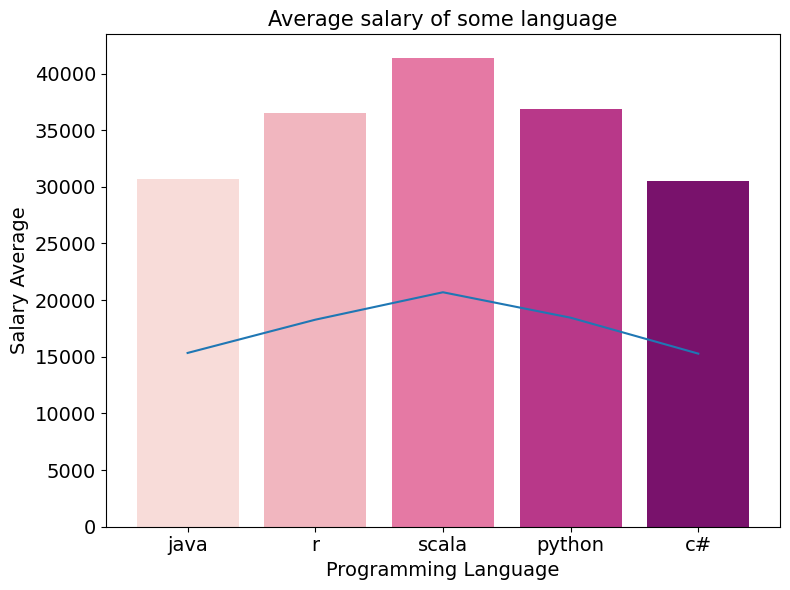

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
# bar graphic
sns.barplot(x=x_values, y=y_values, ax=ax, data=new_df, palette='RdPu')
# line graphic
sns.lineplot(df_line) 
# Choosing the title
ax.set_title("Average salary of some language", fontdict={'fontsize':15})
# Choosing the name to axis x
ax.set_xlabel('Programming Language', fontdict={'fontsize':14})
# Choosing the name to axis y
ax.set_ylabel('Salary Average', fontdict={'fontsize':14})
# Setting a size for programming's name
ax.tick_params(labelsize=14)
fig.tight_layout()

With this graphic you know the salary average to some programming language and choose with which tools you'd like to work in you project.